This homework will:
* Remind you how to ~google~ learn and navigate in previously unknown topics
* Show you how to create paper-ready plots in Python
* Sharpen your skills in data analysis and making educated guesses

As mentioned earlier, we expect you to be familiar with Python's trivial syntax, idioms, and constructs, or learn them on the fly.

**Notes:**
* We will be using matplotlib as our main graphics library. If for any reason you don't like this package feel free to use other solutions.
* Submit your homework as a link to a Colab notebook. Share (right corner) -> Anyone with link -> Copy link.
* Write answers directly in the Colab, a link to colab is the only form of a report.
* *After each section, question or assignment, there is a label with the maximum points you can earn. The maximum score for HW is 10, but you **don't** have to do everything. Remember, in HSE 8 is also an excellent result.
* The code in each cell is just a recommendation. Feel free to write your own implementation that does the same, or follow hints that I left for you.
* Better to write at least some answers, then skip the homework completely.
* Remember, brevity is the soul of wit.
* If you copy your friend's answers, that's bad, but we can't reliably control it. At the very least understand each line of code and retype it yourself with a different structure. **Direct or naive plagiarism will be punished according to the HSE rules.**

Don't forget to submit the feedback! Especially if the homework was too difficult or easy for you.

## Introduction [1.5]

Today we will work with RNA sequencing data (RNA-seq), the workhorse of modern transcriptome research.

Below we provide a ***short*** introduction to RNA biology and RNA sequencing experiments. This is not exhaustive, but you are expected to be curious, google, and discuss unknown/unclear points in the group. If something cannot be solved ~by the collective mind~ - feel free to write to me or ask questions at the next lesson.

For those interested, here is a list [list](https://github.com/crazyhottommy/RNA-seq-analysis) with additional resources.



---



---



### Molecular biology primer

There are three main molecules inside the cell:
* DNA - where the genetic information is stored. In humans, DNA is stored exclusively in the *nucleus*.
* RNA - that is used to transfer information from the *DNA* (nucleus) to the *cytoplasm*. DNA is *transcribed* to create RNA.
* Proteins are the molecules that do most of the work inside the cell. They are synthesized in the *cytoplasm* on the basis of RNA, this process is known as *translation*.

That is, the ***main*** flow of genetic information is
```DNA -> transcription -> RNA -> translation -> proteins```.
This is called the central dogma of molecular biology. [Youtube](https://www.youtube.com/results?search_query=central+dogma+of+molecular+biology).

We can think of DNA, RNA, and proteins as simple sequences of either nucleic acids or amino acids. In most cases this simplification is sufficient, but keep in mind that DNA/RNA/proteins also have a high level 3D structure that will affect their biological role (and this structure is context dependent and in most cases unknown).

How do cells react to external stimulation? What is the difference between cells of different tissues of the same organism? The answers lie in a set of active genes.That is, genes (=regions of DNA) that are transcribed into RNA and then translated into proteins.

Obviously, biologists are very interested in proteins that are active inside the cell. However, for technical reasons, a direct and reliable study of the cell proteome is impossible. Instead, researchers focus on the previous step, RNA abundance, the total number of RNA copies for a given gene (or its relative concentration).

State-of-the-art technology to measure RNA abundance is called RNA-seq. It consists of two main steps: (1) isolation of RNA from cells of interest (cancer, tissues, cell lines) and (2) *sequencing* of the RNA. Sequencing is the process of determining the RNA sequences in a given sample. Once the RNAs are sequenced, they can be assigned to genes of origin to assess overall gene expression (also known as activity).

Important remarks:
* RNA-seq measures the concentration of RNA in a group of cells (i.e. it is the average of the entire population)
* We assume that the amount of RNA correlates with the production of a given protein.

Both assumptions are somewhat weak in practice, but sufficient for high-level forecasts.

On your molecular biology & bioinformatics classes you wil find that the above picture is a great simplification. However, this will be enough for our purposes.

### Data format

We can **assume** that the result of the RNA-seq experiment is a simple table like this:

|        | Sample 1 | .... | Sample N |
|--------|----------|------|----------|
| Gene 1 | 35       |      | 897      |
| ....   |          |      |          |
| Gene N | 0        |      | 760      |

And the values ​​in each cell indicate the estimated normalized expression of the gene in this sample. This is not a direct number of RNA copies, but a normalized value strongly correlated with it.

For those interested, the normalization of RNA-seq experiments is a very complex topic. We will use TPM values ​​and trust that all basic assumptions remain valid.

### Questions
* [0.3] Why do we use RNA sequencing but don't measure proteins directly? Provide a brief **high-level** description of the major technical reasons.

→ Секвенирование РНК используется вместо прямого измерения белков по нескольким техническим причинам. Во-первых, секвенирование РНК является более чувствительным и точным методом определения уровней экспрессии генов по сравнению с методами измерения белка. Во-вторых, секвенирование РНК позволяет обнаруживать альтернативный сплайсинг и посттранскрипционные модификации, которые могут влиять на уровни экспрессии белка. В-третьих, секвенирование РНК является менее дорогостоящим и более масштабируемым методом по сравнению с методами измерения белка. Наконец, секвенирование РНК может быть выполнено на небольших количествах исходного материала, что делает его полезным для изучения редких или ценных образцов.

* [0.3] Why might RNA-seq be a poor indicator of protein abundance?

→ RNA-seq может быть плохим показателем обилия белка, поскольку существует несколько этапов между транскрипцией РНК и синтезом белка, которые могут влиять на уровни экспрессии белка. Например, стабильность мРНК, эффективность трансляции и посттрансляционные модификации - все это может влиять на конечное количество белка, продуцируемого из данного транскрипта мРНК. Кроме того, не все транскрипты мРНК транслируются в белок, и некоторые белки могут иметь более длительный период полураспада, чем соответствующие им транскрипты мРНК. Следовательно, хотя RNA-seq может предоставить ценную информацию об уровнях экспрессии генов, он не всегда может точно отражать содержание соответствующих белков.

* [0.3] Give four examples where the transcribed RNA is directly involved in some biological process (i.e., it functions without translation, which violates the central dogma). Give a brief explanation for each example (1 sentence).

→ 1. Рибосомальная РНК (рРНК) функционирует как структурный компонент рибосом, которые отвечают за синтез белка.
2. Транспортная РНК (тРНК) переносит аминокислоты в рибосому во время трансляции и необходима для синтеза белка.
3. микроРНК (miRNAs) регулируют экспрессию генов путем связывания с транскриптами мРНК и предотвращения их трансляции в белок.
4. Длинные некодирующие РНК (lncRNAs) играют роль в регуляции генов и могут влиять на структуру хроматина и транскрипционную активность.

* [0.3] What kinds of analyzes can we perform using RNA sequencing data? Describe any two of them in detail.

→ 1. Дифференциальный анализ экспрессии генов: Этот тип анализа сравнивает уровни экспрессии генов между двумя или более группами образцов (например, здоровая ткань против пораженной, обработанные клетки против необработанных). Цель состоит в том, чтобы идентифицировать гены, которые дифференциально экспрессируются (DE) между группами, что может дать представление о лежащих в основе биологических механизмах или болезнетворных процессах. Для выполнения этого анализа считывания RNA-seq сначала сопоставляются с эталонным геномом или транскриптомом, а затем количественно определяется количество считываний для каждого гена. Затем количество считываний нормализуется и применяются статистические тесты для идентификации генов DE на основе изменения кратности и пороговых значений значимости.

2. Сборка транскриптома: Этот тип анализа направлен на реконструкцию полного набора транскриптов (т.е. всех молекул РНК), присутствующих в образце, включая новые транскрипты, которые могут не быть аннотированы в эталонном геноме или транскриптоме. Сборка транскриптома может быть полезна для идентификации альтернативных событий сплайсинга, новых изоформ и некодирующих РНК, которые могут выполнять важные биологические функции. Для выполнения этого анализа считывания RNA-seq сначала de novo собираются в контиги или транскрипты с использованием специализированного программного обеспечения. Собранные транскрипты затем аннотируются и классифицируются на основе их кодирующего потенциала, длины и сходства с известными транскриптами. Полученный транскриптом может быть дополнительно проанализирован для экспрессии генов, функциональной аннотации и сравнительных исследований геномики.

* [0.3] Imagine that you are studying a group of cells in two conditions. You need to compare their transcriptome between two states and you decide to run RNA sequencing in duplicate (2x2 = 4 samples). What will be the approximate cost of sequencing these samples using the Total RNA-seq protocol in the US? Provide links.

→ Стоимость секвенирования РНК может варьироваться в зависимости от платформы секвенирования, глубины секвенирования и поставщика услуг. В качестве примера мы можем оценить стоимость секвенирования четырех образцов с использованием протокола Total RNA-seq на платформе Illumina NovaSeq у коммерческого поставщика услуг в США.

Согласно веб-сайту центра геномики в Калифорнийском университете в Дэвисе, стоимость секвенирования одной полосы NovaSeq для 100 миллионов парных считываний (2x100 п.н.) с использованием протокола Total RNA-seq составляет 1800 долларов (https://dnatech.genomecenter.ucdavis.edu/illumina-novaseq /). Поскольку у нас есть четыре выборки, и мы хотим упорядочить их в двух экземплярах, нам понадобится по две полосы на выборку, или в общей сложности восемь полос. Таким образом, приблизительная стоимость секвенирования этих образцов составила бы:

1800 долларов x 8 дорожек x 4 образца = 57 600 долларов

Это всего лишь приблизительная стоимость, и фактическая стоимость может варьироваться в зависимости от конкретного поставщика услуг и любых дополнительных услуг или скидок, которые могут быть доступны.


---



---


You are expected to search answers online and discuss with your more experienced colleagues. Just remember to understand and explain everything in your own words.


# Data preprocessing [1.5]

We are going to use pre-processed RNA-seq data from mouse brain cells with 2 genotypes - wild type (WT) and ADAR1-KO (aka knockout/inactive/disrupted ADAR1 gene).

**[1] points in this section is for writing code.**

In [2]:
# gdown - shell tool to download files from google drive by ID
# ! => run shell command instead of python command
!gdown 1g05Wfjyxa1eMfpUiHpndFWWNuTikJBlc

Downloading...
From: https://drive.google.com/uc?id=1g05Wfjyxa1eMfpUiHpndFWWNuTikJBlc
To: /content/HW-1.TPM.tsv.gz
100% 1.15M/1.15M [00:00<00:00, 43.3MB/s]


In [3]:
import pandas as pd
import numpy as np

# Load tab separated HW-1.TPM.tsv.gz file, and create a data frame
# hint: read_csv with sep
df = pd.read_csv('HW-1.TPM.tsv.gz', sep ='\t')

# Show the first 5 rows
df.head(n=5)

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
0,ENSMUSG00000000001,Gnai3,41.497520,36.699438,37.343788,38.061131,37.586224,32.082841
1,ENSMUSG00000000003,Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028,Cdc45,1.885241,2.411933,1.662913,2.533332,2.380505,2.200205
3,ENSMUSG00000000031,H19,4.660286,2.929563,11.034701,6.114367,37.147375,3.223032
4,ENSMUSG00000000037,Scml2,1.008518,1.175329,0.775612,1.114238,0.891466,0.933327


If this were a completely new project, you must first refine the meaning of each column. In our case:
* `gene_id` - gene id from the [Ensembl database](https://ensembl.org/index.html)
* `gene_name` - name of the gene
* `WT 1/2/3` - estimated expression of the gene in WT samples 1..3
* `ADAR1-KO` - estimated expression of the gene in ADAR1-KO samples

[0.25] What is the function of this protein, ADAR1? Check its [gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ADAR) and provide a short summary (1-2 sentences)

→ ADAR1 катализирует редактирование РНК от A до I, что может влиять на экспрессию и функционирование генов. Это может изменять последовательности кодонов в мРНК, изменять сайты сплайсинга, увеличивать стабильность РНК и геномов РНК-вирусов, а также влиять на активности, зависящие от структуры РНК.


Before continuing, we also need to check that the numeric columns have been parsed correctly and that we don't have any missing values.

In [4]:
# Print dtypes and make sure that all expression columns are float64
df.dtypes

gene_id        object
gene_name      object
WT 1          float64
WT 2          float64
WT 3          float64
ADAR1-KO 1    float64
ADAR1-KO 2    float64
ADAR1-KO 3    float64
dtype: object

In [5]:
# Check that we don't have missing values
# hint: isna with sum
totalna = df.isna().sum().sum()
print("Total NA cells: ", totalna)

# Assert that its actually 0 and provide some message if it's not
assert totalna == 0, 'i am really sad that we have NA'

Total NA cells:  0


The values ​​of the normalized expression in this dataset cannot be less than 0. Let's check if it's true:

In [6]:
# Select numerical columns
# hint: select_dtypes
numcols = df.select_dtypes(include = np.number).columns

# Assert that the total number of values < 0 is 0
assert df[df[numcols] < 0].sum().sum() == 0, \
  "All RNA abundance estimates must be > 0"

Now let's drop genes that are barely expressed:

In [7]:
# Calculate non-zero quantiles for each expression column
qthr = 0.01
quantiles = []
for col in df[numcols]:
  series = df[col]
  # Select non zero values
  series = series[series > 0]
  # Calculate quantiles
  q = series.quantile(qthr)

  quantiles.append(q)

# Print results
for col, q in zip(numcols, quantiles):
  print(f'{col} -> {q}')
  # assert that quantile is not zero
  assert q != 0, 'quantile is zero'

WT 1 -> 0.01082312
WT 2 -> 0.01019045
WT 3 -> 0.01016553
ADAR1-KO 1 -> 0.01011308
ADAR1-KO 2 -> 0.00947186
ADAR1-KO 3 -> 0.011762540000000002


In [8]:
# As a threshold we will use a min quantile
threshold = min(quantiles)

print("Genes before", df.shape[0])

# We will drop all columns,
# where the expression is below the threshold in all samples
mask = (df[numcols] >= threshold).any(axis=1)
df = df[mask]

print("Genes after", df.shape[0])

Genes before 55414
Genes after 32541


Let's check the genes with the total maximum expression in all samples:

In [9]:
overallexpr = df[numcols].sum(axis=1)

# New trick:
## sort by index
argsort = overallexpr.argsort()

## select top 15 elements
index = argsort[-15:]

# Print selected genes
# hint: use iloc for indexing using row ids
df.iloc[index]

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
18695,ENSMUSG00000065947,mt-Nd4l,3244.481524,3787.011878,5191.404945,4300.233598,4692.699653,3824.266417
49540,ENSMUSG00000115420,Rmrp,4648.810066,5935.635789,5110.159742,4217.981449,3487.013390,3726.549261
17925,ENSMUSG00000064363,mt-Nd4,4578.895973,4504.075658,5439.584430,5016.570289,5410.107547,5138.580676
17919,ENSMUSG00000064356,mt-Atp8,3451.798433,3194.473193,6608.528970,4569.459389,6933.611236,5597.696083
17923,ENSMUSG00000064360,mt-Nd3,4762.398471,4759.783429,6556.043245,6048.342017,6107.484679,5500.308998
17932,ENSMUSG00000064370,mt-Cytb,7140.148099,7157.130352,7060.157734,7265.976052,7694.228833,7855.445480
17904,ENSMUSG00000064341,mt-Nd1,7689.936568,7120.516366,7850.802297,8494.714554,9201.511742,8645.226517
35986,ENSMUSG00000100862,Gm10925,8668.572102,7631.164943,8472.854381,9178.058135,10870.244060,9758.700512
36227,ENSMUSG00000101111,Gm28437,9590.183503,9092.210924,10351.376384,9470.910668,11953.672795,10212.991929
30928,ENSMUSG00000092837,Rpph1,11583.957861,12935.043219,12466.619806,13130.398621,10852.620645,10056.491107


Obviously, these genes are not outliers due to their **consistently** high expression.

[0.25] What gene groups do we have here (hint - at least 2)? Give a brief description for each category.

→
  Rmrp : РНК-компонент эндорибонуклеазы, процессирующей митохондриальную РНК
  
  7SK : малая ядерная РНК
  
  Rpph1 : компонент H1 рибонуклеазы Р-РНК

# Quality control [5]

The data is ready, and, fortunately, without obvious problems. In this homework we will focus on basic quality control (QC) figures.

Several decades ago such plots would have been included in almost all relevant publications. Now the quality of RNA sequencing has improved significantly, and the researchers simply mention that the samples passed the standard quality check.

## PCA [1.5]

It is a well-known observation that PCA decomposition of expression profiles should group samples according to their origin. In our case, we expect to observe two clusters - KO and WT cells.

The closer the samples are to each other on the PCA plot, the better. However, we are fine as long as the samples can be separated by a straight line.


**[0.5] points in this section is for writing code.**

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select expression columns
data = df[numcols]
# Transpose the matrix to treat genes as features
data = data.transpose()
# Transform to zero mean and unit variance
data = StandardScaler().fit_transform(data)

# first thing is to calculate the PCA decomposition
# hint: don't forget the random state & request 2 components to make a 2D plot
pca = PCA(random_state=32, n_components = 2)
pca = pca.fit_transform(data)

samples, coords = pca.shape
print(f"Samples: {samples}")
print(f"Components: {coords}")

Samples: 6
Components: 2


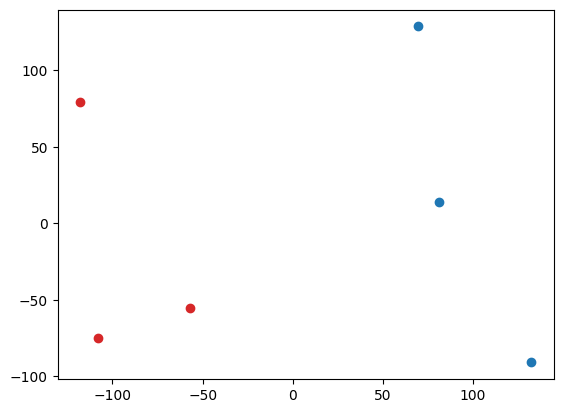

In [11]:
import matplotlib.pyplot as plt
# colors in HEX format
palette = {"WT": "#1F77B4", "ADAR1-KO": "#D62728"}

# Create a basic draft
fig = plt.figure()
ax = fig.gca()

for (x, y), col in zip(pca, numcols):
  group = "WT" if "WT" in col else "ADAR1-KO"
  color = palette[group]
  ax.scatter(x, y, color=color)


fig.show()

[1.0] Your task is to start with the plot above and reproduce the below version:

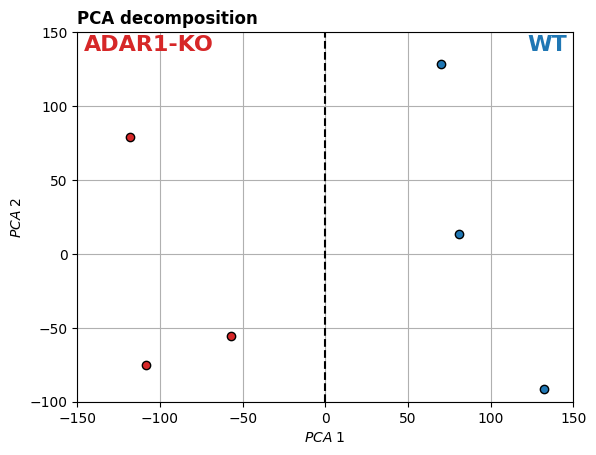

In [12]:
import matplotlib.pyplot as plt
# colors in HEX format
palette = {"WT": "#1F77B4", "ADAR1-KO": "#D62728"}

# Create a basic draft
fig = plt.figure()
ax = fig.gca()
ax.set_title('PCA decomposition', fontweight ='bold', loc = 'left')
ax.set_xlabel('$PCA$ 1')
ax.set_ylabel('$PCA$ 2')
ax.grid()
ax.axvline(x = 0, color = 'k', linestyle = '--')
ax.set_xlim(-150, 150)
ax.set_ylim(-100, 150)

for (x, y), col in zip(pca, numcols):
  group = "WT" if "WT" in col else "ADAR1-KO"
  color = palette[group]
  ax.scatter(x, y, color=color, edgecolor='black')

plt.text(-146, 148, 'ADAR1-KO', ha='left', va='top',color = palette['ADAR1-KO'],
         fontsize = 16, fontweight ='bold')
plt.text(146, 148, 'WT', ha='right', va='top', color = palette['WT'],
         fontsize = 16, fontweight ='bold')



fig.show()

Obviously Colab compresses the image when it shows it to you, which is why it's so "blocky". When preparing figures for this article, you should use vector graphics (for example, matplotlib supports SVG export).

## Distance matrix [1]

We can make a more formal version using the distance matrix (calculated over expression values). Distance here is a broad term - we can use both strict mathematical distance metrics ($|l_1|$, $|l_2|$, etc.) and more informal ones based on correlation.

For example, let's use $dist(X, Y) = 1 - corr(X, Y)$.

**[0.5] points in this section is for writing code.**

<ipython-input-13-3f9b30065608>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('spearman')


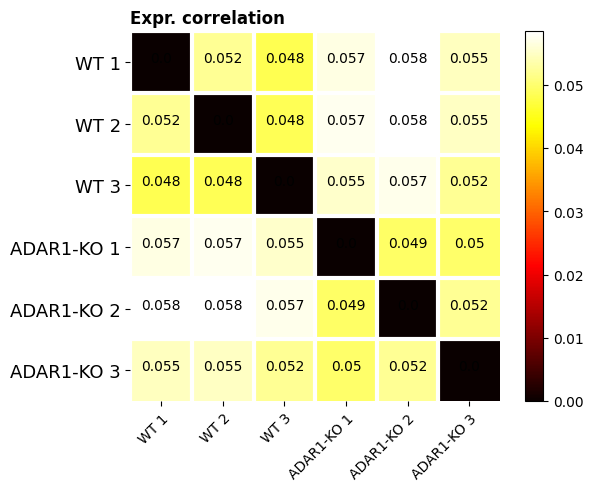

In [13]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Calculate the spearman correlation
corr = df.corr('spearman')
corr = 1 - corr


fig, ax = plt.subplots() # same as figure + .gca()

# cmap - mapping between values and colors
cmap = cmap=plt.get_cmap('hot')
# imshow = image show (yes, we treat the matrix as a picture)
im = ax.imshow(corr, cmap=cmap)

loc, labels = np.arange(len(numcols)), list(numcols)

# Create ticks
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax.set_yticks(loc)
ax.set_yticklabels(labels, fontsize=13)

# label cells
for x in loc:
  for y in loc:
    value = corr.iloc[x, y]
    ax.text(x, y, round(value, 3), ha = 'center')

# Disable spines
for s in ax.spines.values():
  s.set_visible(False)

# Add minor ticks
ax.set_xticks(loc - 0.5, minor=True)
ax.set_yticks(loc - 0.5, minor=True)

# And create a grid based on them
ax.grid(which='minor', color = 'white', linewidth = 3)

ax.tick_params(which="minor", bottom=False, left=False)

ax.set_title('Expr. correlation', fontweight = 'bold', loc = 'left')

# Colorbar to visualize the cmap
fig.colorbar(im, ax=ax)

fig.show()

[0.25] Can you provide at least two reason why the third KO sample is an outlier in terms of the correlation with WT cells?

→ Различие небольшое между значениями корреляции с WT  у третьего нокаута по сравнению с первым и вторым, однако если посмотреть на график PCA decomposition, то он будет отличаться от остальных нокаутов и он больше остальных походит на дикий тип.

[0.25] Play around with the style of the plot and provide your best version below.

<ipython-input-28-cf713e7e4de4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('spearman')


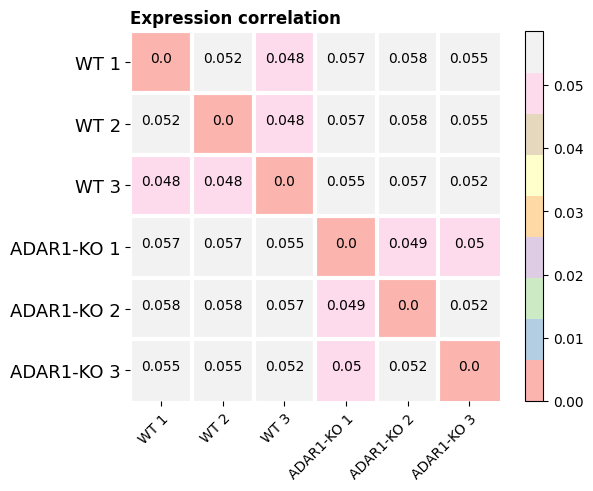

In [28]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Calculate the spearman correlation
corr = df.corr('spearman')
corr = 1 - corr


fig, ax = plt.subplots() # same as figure + .gca()

# cmap - mapping between values and colors
cmap=plt.get_cmap('Pastel1')
# imshow = image show (yes, we treat the matrix as a picture)
im = ax.imshow(corr, cmap=cmap)

loc, labels = np.arange(len(numcols)), list(numcols)

# Create ticks
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax.set_yticks(loc)
ax.set_yticklabels(labels, fontsize=13)

# label cells
for x in loc:
  for y in loc:
    value = corr.iloc[x, y]
    ax.text(x, y, round(value, 3), ha = 'center')

# Disable spines
for s in ax.spines.values():
  s.set_visible(False)

# Add minor ticks
ax.set_xticks(loc - 0.5, minor=True)
ax.set_yticks(loc - 0.5, minor=True)

# And create a grid based on them
ax.grid(which='minor', color = 'white', linewidth = 3)

ax.tick_params(which="minor", bottom=False, left=False)

ax.set_title('Expression correlation', fontweight = 'bold', loc = 'left')

# Colorbar to visualize the cmap
fig.colorbar(im, ax=ax)

fig.show()

## Expression distribution [1.5]

Let's have a look at binned distribution of genes expression:

**[0.25] points in this section is for writing code.**

[None]

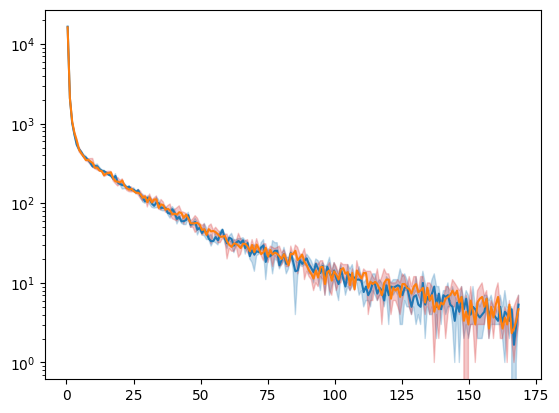

In [16]:
fig, ax = plt.subplots()

# Let's ignore the highly expressed genes -
# it makes no sense to bin them, since there are only a few of them.
upthr = df[numcols].quantile(0.98).max()

# Create 200 bins ranging from 0 to upthr
# hint: use numpy
bins = np.linspace(0, upthr, 200)

# Calculate center of each bin
# hint: slice with step & sum & divide by 2
X = (bins[:-1] + bins[1:]) / 2

# Plot each genotype
for genotype in "WT", "ADAR1-KO":


  # There are 3 samples of each genotype
  counts = []
  for col in numcols:
    if genotype not in col:
      continue
    # count number of genes in each bin
    c, _ = np.histogram(df[col], bins)
    counts.append(c)

  # Turn list of 1D arrays into dense 2D array
  counts = np.asarray(counts)
  # Calculate stats for each bin
  meanv, minv, maxv = counts.mean(axis=0), counts.min(axis=0), counts.max(axis=0)

  # Get the color from the palette
  color = palette[genotype]

  # Plot the mean trend
  ax.plot(X, meanv)
  # Shade between min and max
  ax.fill_between(X, maxv, minv, color=color, alpha=0.25)

ax.set(yscale='log')

[0.5] What observations can we make based on this graph? *Hint: right tail.*

→ С ростом значения экспресии генов все меньше генов с таким значением и убывание становится все более пологим (производная по модулю уменьшается)

[0.75] Now your task is to use all your skills and embellish this plot just like we did with the PCA figure. For example, be sure to include the legend, title, grid, and axis labels.

[None]

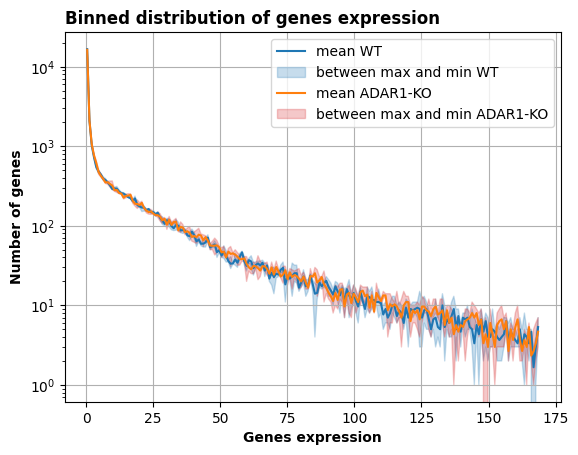

In [30]:
fig, ax = plt.subplots()
upthr = df[numcols].quantile(0.98).max()
bins = np.linspace(0, upthr, 200)
X = (bins[:-1] + bins[1:]) / 2
for genotype in "WT", "ADAR1-KO":
  counts = []
  for col in numcols:
    if genotype not in col:
      continue
    c, _ = np.histogram(df[col], bins)
    counts.append(c)
  counts = np.asarray(counts)
  meanv, minv, maxv = counts.mean(axis=0), counts.min(axis=0), counts.max(axis=0)
  color = palette[genotype]
  ax.plot(X, meanv)
  ax.fill_between(X, maxv, minv, color=color, alpha=0.25)
ax.grid()
ax.set_title('Binned distribution of genes expression', fontweight = 'bold',
             loc = 'left')
ax.set_xlabel('Genes expression', fontweight = 'bold')
ax.set_ylabel('Number of genes', fontweight = 'bold')
ax.legend(['mean WT', 'between max and min WT', 'mean ADAR1-KO',
           'between max and min ADAR1-KO'])
ax.set(yscale='log')

## Expression heatmap [1]

Now let's visualize the expression of top N genes. First - let's get the data:

In [18]:
# As before, we will select genes based on their overall expression
sumexpr = df[numcols].sum(axis=1)

topn = 250
# select indices of topn genes with max expression
ind = sumexpr.argsort()[-topn:]

# get the expression values
expr = df.iloc[ind][numcols]
expr

,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
16822,354.666801,378.119043,351.839586,337.193413,332.245688,313.615214
18815,399.123179,370.559682,370.802462,285.393773,358.448513,299.900925
8889,370.760177,371.130393,341.416847,348.605561,352.361944,322.746592
15722,330.728785,300.830754,366.588915,322.513975,403.102266,388.014514
3026,375.038797,349.275206,349.147615,366.439702,349.525445,324.287622
...,...,...,...,...,...,...
17914,11752.649712,11573.023455,12443.641672,13559.402518,14370.470688,13691.010991
37132,14274.473853,14348.844034,15964.720522,15954.974569,17029.868971,16250.250283
52514,24940.017679,25474.594691,113278.214067,11773.807530,33228.528517,20900.377150
54582,102334.349529,106563.019037,105427.248728,102413.253603,97606.676391,108510.891018


This time, we will focus on the `seaborn` library - a framework built on top of the `matplotlib`. In fact `seaborn` is a nice collection of figure templates, that are fairly customizable.

[0.75] Look through the [seaborn](https://seaborn.pydata.org/) documenation and find a function that will give produce the figure below:

Text(0.56, 0.99, 'Expression of top 250 genes')

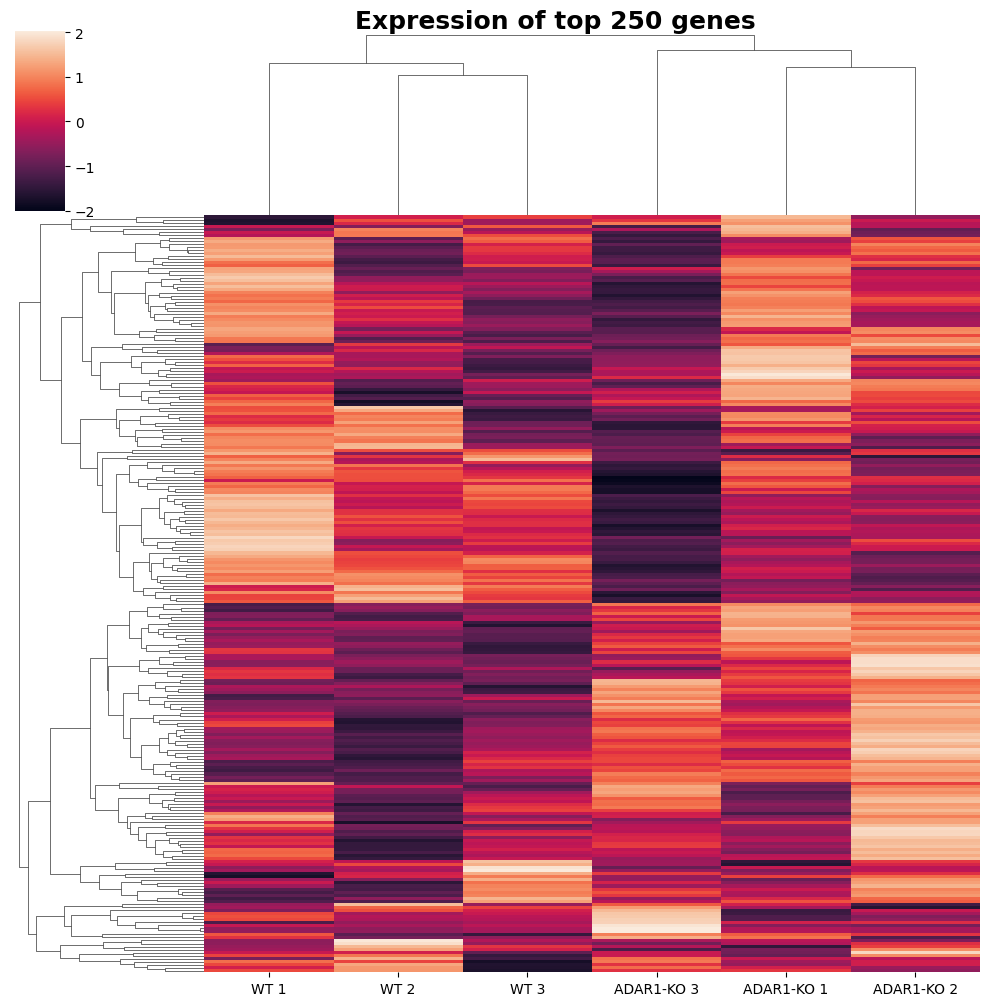

In [19]:
import seaborn as sns

# Plot the data
cluster = sns.clustermap(expr, z_score = 2, yticklabels = False)

# Disable x axis labels
# hint: cluster.ax_heatmap is a simple matplotlib axis instance

# Add figure title
# hint: cluster.figure is a simple matplotlib figure
cluster.fig.suptitle('Expression of top 250 genes', fontweight = 'bold',
                     ha = 'center', va = 'center', x = 0.56, y = 0.99,
                     fontsize = 18)

This is a nice example of variability that can be observed in real world biological data. However, in most cases such difference is not significant and just a random noise. Otherwise... It's useless.

[0.25] For what popular RNA-seq analysis would such a figure be good supporting evidence? Insert an example image (using the link).

Он хорошо бы подошел для анализа Single-cell RNA sequencing.
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5840315/figure/Fig1/

# Extra points [2]

RNA-seq analysis is a trending topic in the literature. To get extra point you need to:
1. Find a publication that used RNA sequencing to study the cellular transcriptome.
2. [0.5] Briefly describe the purpose of the study and the experiment in particular
3. [1.5] Select the figure of your choice in this study and reproduce it as accurately as possible

Hint: look for publications that present so-called source (raw) data, i.e. the data on which the figures are based.



1. https://pubmed.ncbi.nlm.nih.gov/29511234/

  2. Эмбриональное развитие первоначально контролируется материнскими РНК и белками, хранящимися в яйцеклетке, до тех пор, пока генные продукты, постепенно вырабатываемые самим эмбрионом, не возьмут верх. Основная активация эмбрионального генома (EGA) у эмбрионов крупного рогатого скота происходит на стадии от восьми до 16 клеток. Морфологические наблюдения, такие как размер бластомеров и распределение микроворсинок, указывают на гетерогенность отдельных клеток уже на этой стадии развития. Чтобы устранить клеточную гетерогенность на уровне транскриптома, в статье провели секвенирование одноклеточной РНК 161 бластомера из 14 эмбрионов крупного рогатого скота, полученных in vitro, на 2-й (n = 6) и 3-й (n = 8) день после оплодотворения. Комплементарные библиотеки ДНК были подготовлены с использованием протокола одноклеточного РНК-штрихкодирования и секвенирования и секвенированы. Неконтролируемая кластеризация профилей одноклеточных транскриптомов выявила шесть кластеров со специфическими наборами генов. Большинство эмбрионов состояли из клеток по крайней мере из двух разных кластеров. Сортировка клеток в соответствии с их профилями транскриптома привела к получению неразветвленной псевдовременной линии, что свидетельствует против основных событий, связанных с наклонностью линии на этой стадии развития. Таким образом, исследование выявило гетерогенность профилей транскриптома среди отдельных клеток у эмбрионов крупного рогатого скота на 2-й и 3-й день, что свидетельствует об асинхронном развитии бластомеров во время фазы основного EGA.